In [16]:
import numpy as np
import pandas as pd
import geoplot as gplt
import geoplot.crs as gcrs
import geopandas as gpd
from shapely.geometry import Point,Polygon
import shapely
from shapely import wkt
import matplotlib.pyplot as plt

In [36]:
nyc_permit = pd.read_csv('/Users/krishna-mac/Desktop/CitadelDataOpen/Data2/Updated_Liquor_Licenses.csv')

In [38]:
for i,x in enumerate(nyc_permit['Georeference']):
    coord = x.split()
    x = float(coord[1][1:])
    y = float(coord[2][:-1])
    
    if (x < -74.2555913 or x > -73.70000906 or y < 40.4961154 or y > 40.91553278):        
        nyc_permit = nyc_permit.drop(i)

In [40]:
nyc_permit['geometry'] = nyc_permit['Georeference'].apply(wkt.loads)
crs = 'EPSG:4326'
geo_df = gpd.GeoDataFrame(nyc_permit, crs = crs, geometry = nyc_permit.geometry)
geo_df = geo_df.dropna()

<GeoAxesSubplot:>

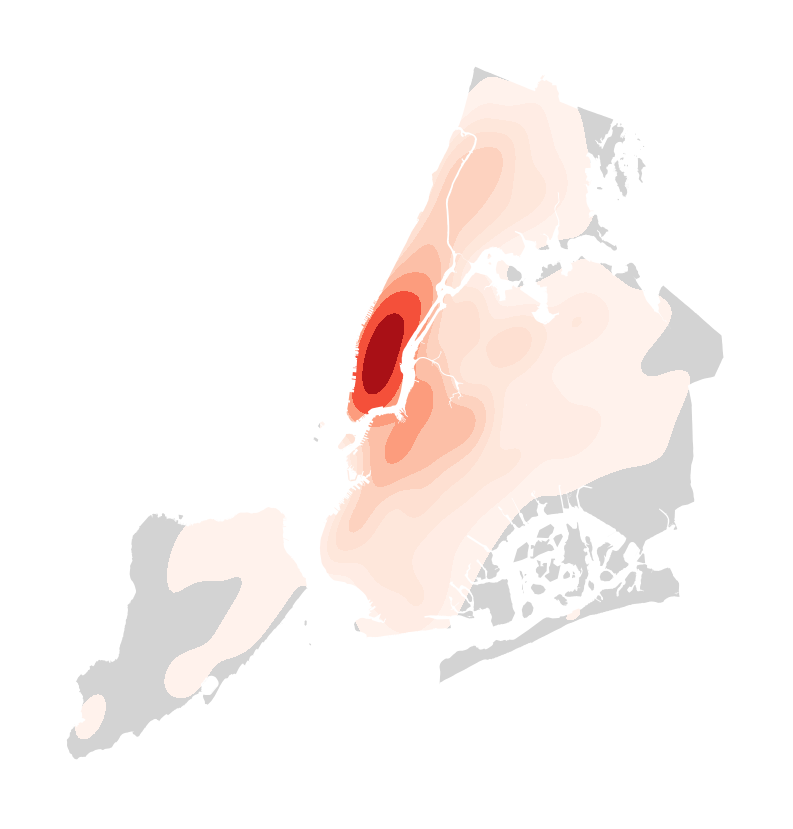

In [43]:
boroughs = gpd.read_file(gplt.datasets.get_path('nyc_boroughs'))
ax = gplt.polyplot(boroughs, figsize = (15,15), projection=gcrs.AlbersEqualArea(), zorder=1, color='lightgrey')
gplt.kdeplot(geo_df, cmap='Reds', shade=True, clip=boroughs, ax=ax)